---
# Analysis of cGenie AMOC Sensibility Experiments
---

**Author:** Amaury Laridon

**Date:** 27/11/2023

---
Three experiments have been perform by Justin Gérard for my Master's Thesis. The goal of those experiment is to produce the bifurcation diagram and to retrieve critical bifurcation coordinates on which I will calibrate my simplified model of the AMOC in the Tipping Cascade Module of the AMOC-GIS that I implement in SURFER. 

In the parameterization B of the fresh water flux the ODE model that encodes the dynamics of the AMOC in my tipping module is the following : 

$$      \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}, F_O) \quad (1)      $$

The goal from the experiments made with cGenie is to retrieve the coordinates,

$$  \left\{(\Psi^+, T^+), (\Psi^-, T^-), (\Psi^+, F_{GIS}^+), (\Psi^-, F_{GIS}^-), (\Psi^+, F_{O}^+), (\Psi^-, F_{O}^-)\right \} $$

The experiments are the following one :

- **ExpA = Bifurcation experiment with a $CO_2$ forcing** and constant freshwater forcing.
    - In our module we force the AMOC with a temperature forcing but we can find a relation to convert a forcing in $CO_2$ into a forcing in temperature. 
- **ExpB = Bifurcation experiment with a $F_{GIS}$ forcing** and constant $CO_2$ forcing and constant $F_{O}$ freshwater forcing.
    - Hosing experiment of $0.2 \; Sv$ injected between 50°N and 70°N and 45°W and 5°E with constant salinity over the global ocean.
- **ExpC = Bifurcation experiment with a $F_{O}$ forcing** and constant $COO_2$ forcing and constant $F_{O}$ freshwater forcing.

---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

Loading Data

In [38]:
## Personnal data path ## 

personal_data_path_ExpA = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_CO2/biogem/"
personal_data_path_ExpB = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_0.2Sv_sal_cst/biogem/"
personal_data_path_ExpC = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_50_and_70_N_0.2Sv_sal_cst/biogem/"

## Reading data ##

forcing_CO_2 = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_pCO2_mod.res",header=1,sep=",")
global_pCO2 = forcing_CO_2["0.279984E-03"]
year_ExpA = forcing_CO_2["0.500"]

forcing_temp = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_temp.res", header=1, sep=",")
global_sat = forcing_temp["12.268095"]
## Output ## 

#print(forcing_temp)
#print(global_sat)
#print(forcing_CO_2)

0      12.267310
1      12.267561
2      12.268229
3      12.267646
4      12.267048
         ...    
534    12.537528
535    11.865298
536    12.018726
537    12.136498
538    12.202236
Name: 12.268095, Length: 539, dtype: float64


---
## ExpA - $CO_2$ Sensibility Experiment
---

### Time series of the forcing

#### $CO_2$ forcing

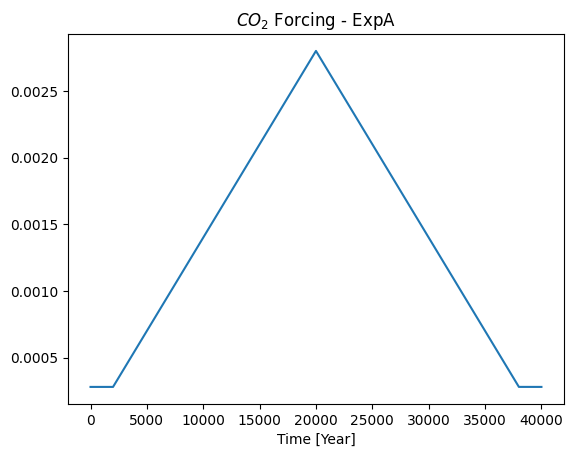

In [31]:
plt.plot(year_ExpA, global_pCO2)
plt.title(r"$CO_{2}$"+" Forcing - ExpA")
plt.xlabel("Time [Year]")

plt.show()

#### Temperature forcing

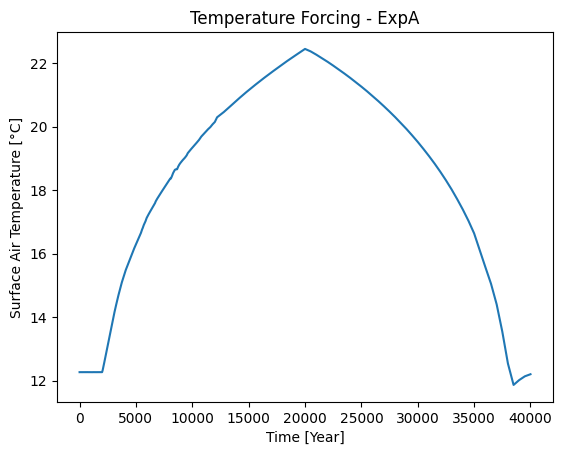

In [42]:
plt.plot(year_ExpA, global_sat)
plt.title("Temperature Forcing - ExpA")
plt.xlabel("Time [Year]")
plt.ylabel("Surface Air Temperature [°C]")

plt.show()

### Data Analysis

#### Min/Max Overtuning Stream-Functions Values

---
## ExpB - $F_{GIS}$ Sensibility Experiment
---

---
## ExpC - $F_{O}$ Sensibility Experiment
---